In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv('final_raw_data.csv', index_col=0)

In [4]:
df

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,1299.999847,1299.932367,302136.689109,305769.201164,1772.343865,1774.851782,68.594624,74.353358,147.288687,147.585464,...,136.327276,143.759105,9.495489,3589.907315,24.949540,16.793090,0.292871,226.883646,96.691254,84.893396
1,1300.226400,1300.251168,304640.254305,308413.348729,1763.698347,1766.412325,69.867494,75.680458,148.394112,148.702840,...,136.481617,144.127431,9.396263,3589.040872,24.899770,16.752399,0.306670,227.210390,97.553439,85.876992
2,1300.401877,1300.324670,307767.688128,309923.396662,1751.874513,1754.791572,74.230762,79.740353,149.876022,150.140761,...,136.724818,144.949424,9.348186,3588.336589,24.849275,16.734525,0.327271,226.870120,100.013257,88.917887
3,1300.999321,1300.981538,304965.223294,305798.703871,1745.351528,1748.101940,77.510875,81.905311,150.727952,150.919297,...,138.909000,145.692630,9.281961,3589.294720,24.800835,16.736368,0.340026,226.517285,102.287710,91.634573
4,1300.152964,1300.122183,303890.394355,305456.528124,1769.924800,1772.682609,69.509302,74.258772,147.729870,147.947300,...,136.743204,143.702224,9.440647,3589.287536,24.900963,16.786923,0.295442,226.968670,97.097614,85.387177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1300.014807,1299.978356,328146.787883,332409.290667,1746.184179,1750.179913,54.454143,53.723855,152.014832,151.837370,...,129.808343,138.296495,7.665222,3591.063641,24.346442,16.731650,0.335747,227.723641,85.839764,73.407111
726,1300.075773,1300.022287,322235.007479,325881.871601,1753.851885,1757.563083,63.465525,63.205607,151.132782,150.834441,...,128.797354,139.073487,7.909175,3590.744042,24.512404,16.760433,0.324609,226.533885,91.384524,80.212035
727,1300.074022,1300.001139,326788.909221,328794.992017,1745.933160,1749.851649,64.446542,65.039585,151.935908,151.775769,...,130.235524,140.468876,7.883044,3590.643061,24.622518,16.754968,0.337274,226.719310,92.404449,81.133404
728,1299.980746,1299.910691,331680.316296,333399.077206,1738.153499,1742.193983,65.146787,65.234078,152.675751,152.569127,...,131.590064,140.312700,7.943633,3590.558191,24.518907,16.732891,0.348273,227.371438,92.978281,81.831523


In [5]:
df.describe()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
count,714.000000,714.000000,717.000000,719.000000,715.000000,714.000000,715.000000,714.000000,713.000000,712.000000,...,713.000000,715.000000,710.000000,592.000000,715.000000,714.000000,714.000000,715.000000,714.000000,714.000000
mean,1273.467433,1273.466150,306611.836549,308426.377263,1697.565158,1700.763127,78.648653,81.766079,131.772868,131.758580,...,131.482560,136.128008,7.759212,3589.133002,24.232921,16.553469,0.298186,209.055025,99.167819,90.765395
std,176.193711,176.195943,65756.271767,69000.826885,237.502508,238.619383,14.255702,14.590470,51.493869,51.528699,...,24.749561,26.179838,2.832094,0.724897,2.592625,2.092727,0.150278,46.277899,15.052034,14.038749
min,-2.859714,-2.848590,0.000000,0.000000,19.134539,15.132671,38.170952,44.281866,0.000000,0.000000,...,45.522457,45.641695,0.846212,3587.175269,-2.475952,0.250583,-0.062279,57.259923,46.537227,46.266731
25%,1299.952355,1299.957631,318080.319292,320962.025049,1720.056323,1723.513636,68.668038,72.769764,148.844170,148.857687,...,133.207665,140.738687,7.717552,3588.649086,24.293542,16.727149,0.308596,226.592263,90.479305,81.621709
50%,1300.117331,1300.101050,323760.382876,327764.547915,1739.403099,1742.907574,79.372894,81.174030,151.331231,151.292521,...,139.161305,144.995577,8.300830,3589.013127,24.579174,16.827570,0.333409,227.023054,100.686523,90.889965
75%,1300.392001,1300.388306,327002.849743,331536.213694,1751.903077,1755.467131,89.546217,91.760944,153.435767,153.480114,...,144.912642,149.461377,9.607391,3589.531500,24.728925,16.955127,0.365978,227.351330,110.576066,101.821304
max,1302.166707,1302.017837,337113.806471,339509.093059,1805.344086,1810.950851,106.842627,112.164064,171.524234,171.646939,...,154.264028,157.557698,11.161157,3591.100557,26.803915,19.312757,0.662165,228.651039,125.456462,117.816248


In [6]:
df.isna().sum()

Auxiliary Boilers A/B Feed Water Header Pressure 2     16
Auxiliary Boilers Feed Water Header Pressure           16
Heat Recovery System Header Mass Flow                  13
Heat Recovery System Header Mass Flow.1                11
Heat Recovery System Header Pressure                   15
Heat Recovery System Header Pressure.1                 16
Lube Oil Cooler Outlet Temperature                     15
Lube Oil Tank Temperature                              16
Motor Current Phase A                                  17
Motor Current Phase B                                  18
Motor Current Phase C                                  20
Motor Input Power                                     543
Motor Power Factor                                    543
Motor Voltage                                          16
Pump Discharge Pressure                                16
Pump Discharge Volumetric Flow                         14
Pump Journal 1 Bearing Temperature                     17
Pump Journal 2

In [7]:
df1=df[df['Auxiliary Boilers A/B Feed Water Header Pressure 2'].isna()]

In [8]:
df1

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,327868.640357,NaN,NaN,NaN,NaN,NaN,151.562447,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,0.000000,38098.225332,22.915899,18.992255,NaN,NaN,NaN,NaN,...,NaN,NaN,0.878929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.276364,147.323925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,NaN,NaN,315040.938686,321303.054788,1765.958460,1769.331035,NaN,NaN,147.865878,147.960176,...,NaN,NaN,NaN,NaN,24.461864,NaN,NaN,NaN,NaN,NaN


In [9]:
df1.isna().sum()

Auxiliary Boilers A/B Feed Water Header Pressure 2    16
Auxiliary Boilers Feed Water Header Pressure          16
Heat Recovery System Header Mass Flow                 12
Heat Recovery System Header Mass Flow.1               11
Heat Recovery System Header Pressure                  14
Heat Recovery System Header Pressure.1                14
Lube Oil Cooler Outlet Temperature                    15
Lube Oil Tank Temperature                             16
Motor Current Phase A                                 11
Motor Current Phase B                                 12
Motor Current Phase C                                 14
Motor Input Power                                     16
Motor Power Factor                                    16
Motor Voltage                                         10
Pump Discharge Pressure                               16
Pump Discharge Volumetric Flow                        14
Pump Journal 1 Bearing Temperature                    16
Pump Journal 2 Bearing Temperat

In [10]:
# most of the columns in these rows are null so its better to remove these entries 
df=df.dropna(subset=['Auxiliary Boilers A/B Feed Water Header Pressure 2'])

In [11]:
df.isna().sum()

Auxiliary Boilers A/B Feed Water Header Pressure 2      0
Auxiliary Boilers Feed Water Header Pressure            0
Heat Recovery System Header Mass Flow                   1
Heat Recovery System Header Mass Flow.1                 0
Heat Recovery System Header Pressure                    1
Heat Recovery System Header Pressure.1                  2
Lube Oil Cooler Outlet Temperature                      0
Lube Oil Tank Temperature                               0
Motor Current Phase A                                   6
Motor Current Phase B                                   6
Motor Current Phase C                                   6
Motor Input Power                                     527
Motor Power Factor                                    527
Motor Voltage                                           6
Pump Discharge Pressure                                 0
Pump Discharge Volumetric Flow                          0
Pump Journal 1 Bearing Temperature                      1
Pump Journal 2

In [12]:
df[df['Pump Radial Bearing Vibration'].isna()]

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
267,-0.181928,-0.505651,0.000000,39072.754616,19.134539,15.132671,67.248220,90.619487,NaN,NaN,...,66.328500,67.291320,NaN,NaN,2.516323,2.463400,-0.044948,68.450908,67.559493,67.381325
300,1300.511081,1300.537767,327126.842066,333790.899379,1734.486118,1738.069849,77.890985,81.557395,152.387723,152.472978,...,141.127485,145.727720,NaN,NaN,24.293892,16.852790,0.372623,227.410276,101.292125,91.357956
306,1300.164382,1300.218583,311750.352103,318666.008076,1758.274706,1761.403537,64.011346,67.282128,149.449164,149.523850,...,134.104200,143.742069,NaN,NaN,24.414831,16.937826,0.330669,227.418213,92.085626,80.586384
307,1300.404908,1300.448461,318040.698749,323966.413637,1738.888938,1742.177341,67.973281,71.275243,152.068965,152.117709,...,135.576937,144.550845,NaN,NaN,24.321528,16.870701,0.361007,227.464964,94.662978,83.734716
548,1299.762743,1299.813831,322387.211310,329635.543406,1768.865845,1772.457091,93.235579,96.681580,NaN,NaN,...,144.726717,149.895534,NaN,NaN,24.751457,17.016821,0.298291,226.732346,113.127295,105.219053
563,1299.587932,1299.815026,NaN,332196.657886,NaN,NaN,104.175480,111.251536,NaN,NaN,...,152.650587,155.410579,NaN,NaN,24.606570,16.931181,0.341141,227.115968,122.491598,114.863076
729,1299.975592,1299.949455,328216.990958,332150.111389,1711.157969,1715.259336,72.609200,72.063911,151.134924,150.876732,...,134.719205,140.893272,NaN,NaN,24.732654,16.714140,0.379412,226.842674,97.270483,87.381454


In [13]:
# Deleting the entries where our y variable is null
df=df.dropna(subset=['Pump Radial Bearing Vibration'])

In [14]:
df.isna().sum()

Auxiliary Boilers A/B Feed Water Header Pressure 2      0
Auxiliary Boilers Feed Water Header Pressure            0
Heat Recovery System Header Mass Flow                   0
Heat Recovery System Header Mass Flow.1                 0
Heat Recovery System Header Pressure                    0
Heat Recovery System Header Pressure.1                  1
Lube Oil Cooler Outlet Temperature                      0
Lube Oil Tank Temperature                               0
Motor Current Phase A                                   3
Motor Current Phase B                                   3
Motor Current Phase C                                   3
Motor Input Power                                     521
Motor Power Factor                                    521
Motor Voltage                                           3
Pump Discharge Pressure                                 0
Pump Discharge Volumetric Flow                          0
Pump Journal 1 Bearing Temperature                      1
Pump Journal 2

In [15]:
def plot_relation(col1,col2):
    plt.figure(figsize=(12,5))
    plt.xlabel('Relationship')

    ax1 = col1.plot(color='blue', grid=True, label="First Variable")
    ax2 = col2.plot(color='red', grid=True, secondary_y=True, label='Second Variable')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()
    


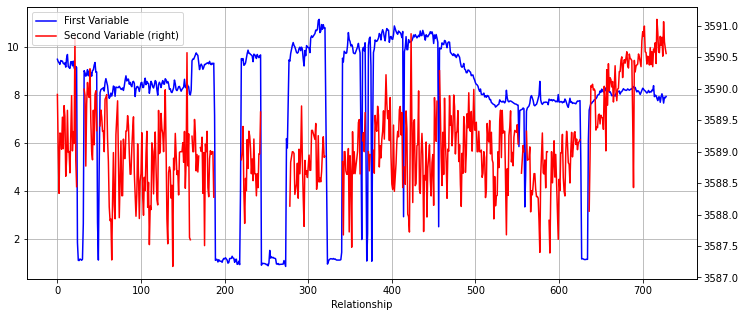

In [16]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Pump Shaft Speed'])

#This is a case of MNAR (Missing not at random values) as we see the PRB Vibration dropping exactly where the Pump Shaft Speed values are missing

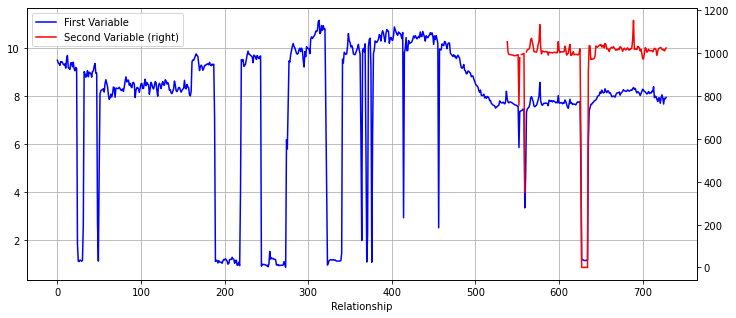

In [17]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Motor Input Power'])


#Although most of the values of Motor Input Power is missing we can see it share a very close direct relationship with our PRB Vibration values around 625 we can see both of then took a sharp fall.

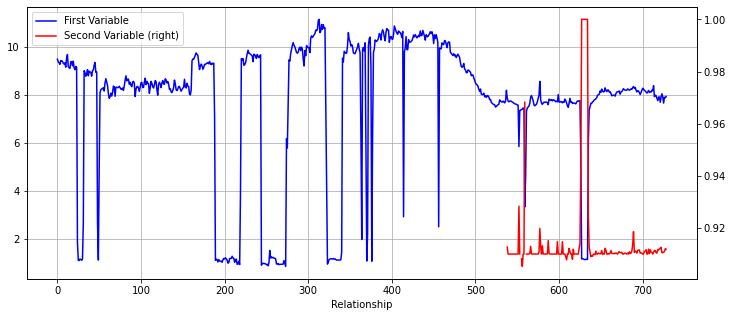

In [18]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Motor Power Factor'])

#Motor Power Factor shows a indirect relationship with both PRB Vibration and Motor Input Power

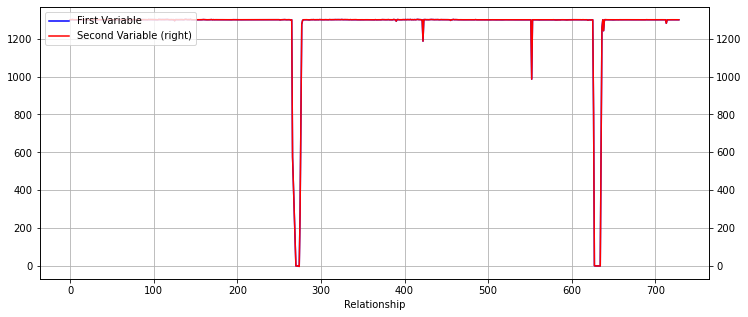

In [19]:
 plot_relation(df['Auxiliary Boilers A/B Feed Water Header Pressure 2'],df['Auxiliary Boilers Feed Water Header Pressure'])

#As we can see these two variables completely overlap each other so we would drop one to reduce dimantionality

In [20]:
df=df.drop(['Auxiliary Boilers A/B Feed Water Header Pressure 2'], axis='columns')

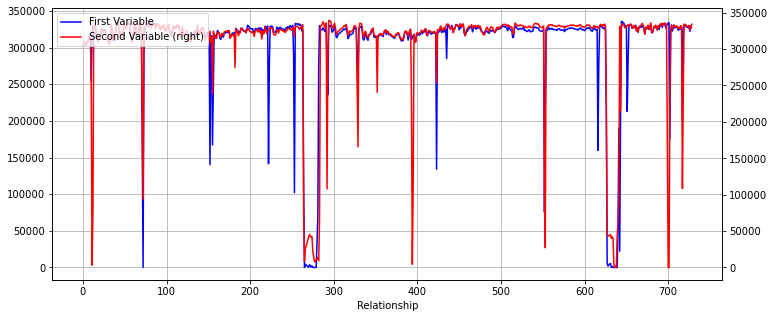

In [21]:
plot_relation(df['Heat Recovery System Header Mass Flow'], df['Heat Recovery System Header Mass Flow.1'])

#The same redundancy of data values can be seen in Heat Recovery System Header Mass Flow and Heat Recovery System Header Mass Flow.1. We will check which one resonates more with our PRB Vibration

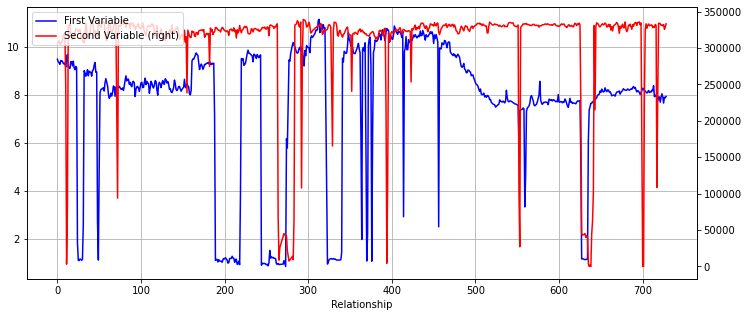

In [22]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Heat Recovery System Header Mass Flow.1'])

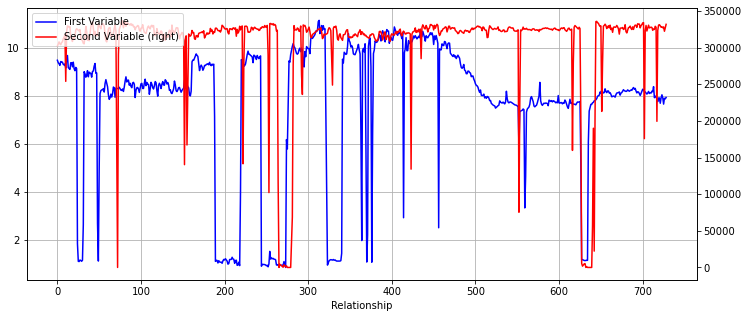

In [23]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Heat Recovery System Header Mass Flow'])

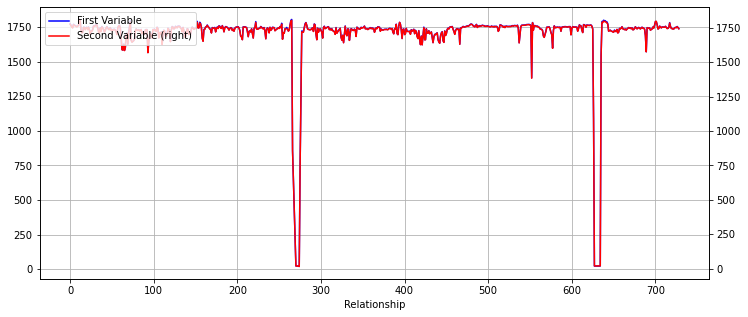

In [24]:
plot_relation(df['Heat Recovery System Header Pressure'],df['Heat Recovery System Header Pressure.1'])

#As we see they both overlap each other we can surely eliminate one

In [25]:
df=df.drop(['Heat Recovery System Header Pressure.1'], axis='columns')

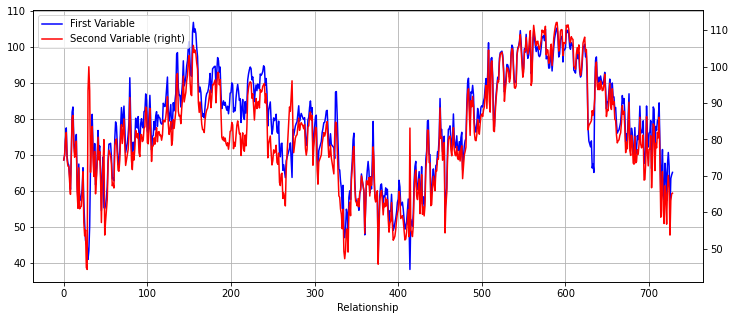

In [26]:
plot_relation(df['Lube Oil Cooler Outlet Temperature'],df['Lube Oil Tank Temperature'])

#These two values are very much similar in their values. We will check each one in with relation with our PBR Vibration 

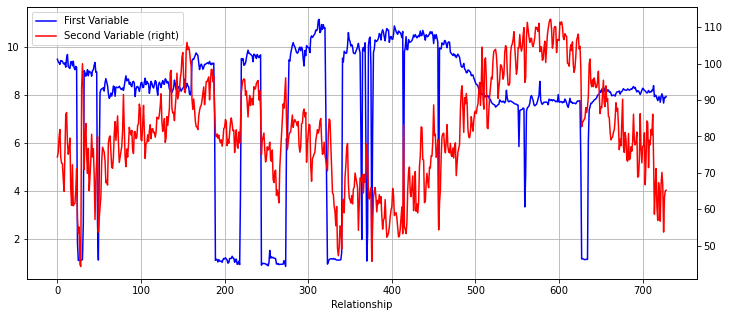

In [27]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Lube Oil Tank Temperature'])

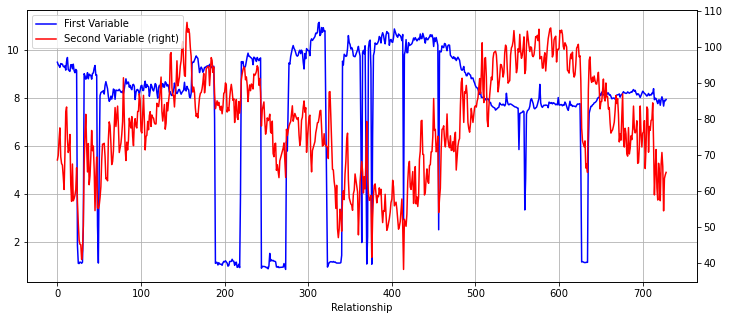

In [28]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Lube Oil Cooler Outlet Temperature'])

In [29]:
#On closer inspection it seems Lube Oil Tank Temprature is more related with PBR Vibration

In [30]:
df=df.drop(['Lube Oil Cooler Outlet Temperature'], axis='columns')

In [31]:
df.isna().sum()

Auxiliary Boilers Feed Water Header Pressure      0
Heat Recovery System Header Mass Flow             0
Heat Recovery System Header Mass Flow.1           0
Heat Recovery System Header Pressure              0
Lube Oil Tank Temperature                         0
Motor Current Phase A                             3
Motor Current Phase B                             3
Motor Current Phase C                             3
Motor Input Power                               521
Motor Power Factor                              521
Motor Voltage                                     3
Pump Discharge Pressure                           0
Pump Discharge Volumetric Flow                    0
Pump Journal 1 Bearing Temperature                1
Pump Journal 2 Bearing Temperature                0
Pump Radial Bearing Vibration                     0
Pump Shaft Speed                                115
Pump Suction Pressure 1                           0
Pump Suction Pressure 2                           0
Pump Suction

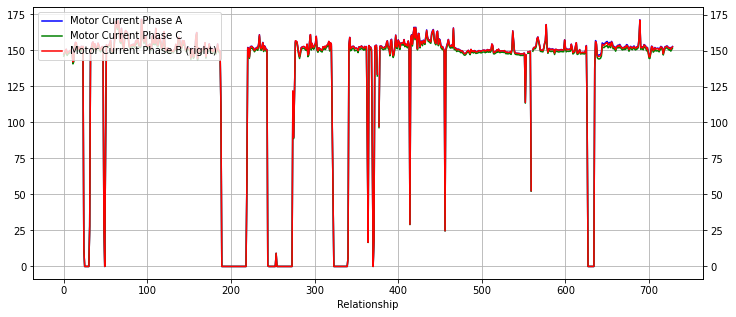

In [32]:
plt.figure(figsize=(12,5))
plt.xlabel('Relationship')

ax1 = df['Motor Current Phase A'].plot(color='blue', grid=True, label="Motor Current Phase A")
ax2 = df['Motor Current Phase B'].plot(color='red', grid=True, secondary_y=True, label='Motor Current Phase B')
ax3 = df['Motor Current Phase C'].plot(color='green', grid=True, label="Motor Current Phase C")    
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2+l3, loc=2)
plt.show()

In [33]:
df[df['Motor Current Phase A'].isna()]

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,Motor Current Phase C,Motor Input Power,Motor Power Factor,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
376,1300.391468,318556.883825,321849.094800,1733.711258,45.725639,NaN,NaN,NaN,NaN,NaN,...,61.743012,61.989750,1.064529,NaN,8.511539,0.354103,-0.060962,179.538268,57.077404,54.839112
554,1299.977602,323946.659904,328130.076798,1728.426736,104.774768,NaN,NaN,NaN,NaN,NaN,...,148.173344,151.842037,7.372437,NaN,24.605388,16.902386,0.348763,226.925017,117.525914,109.906530
560,1299.848647,325137.131947,333071.811462,1749.530571,95.963869,NaN,NaN,NaN,NaN,NaN,...,122.497918,124.636791,4.644980,NaN,25.164491,17.310246,0.166862,202.219319,104.381674,99.717418


In [34]:
#As we can see all three completely overlap each other so we can eliminate any two and fill na values with previous values

In [35]:
df=df.drop(['Motor Current Phase B','Motor Current Phase C'], axis='columns')

In [36]:
df['Motor Current Phase A'].fillna(method='bfill', inplace=True)

In [37]:
df.isna().sum()

Auxiliary Boilers Feed Water Header Pressure      0
Heat Recovery System Header Mass Flow             0
Heat Recovery System Header Mass Flow.1           0
Heat Recovery System Header Pressure              0
Lube Oil Tank Temperature                         0
Motor Current Phase A                             0
Motor Input Power                               521
Motor Power Factor                              521
Motor Voltage                                     3
Pump Discharge Pressure                           0
Pump Discharge Volumetric Flow                    0
Pump Journal 1 Bearing Temperature                1
Pump Journal 2 Bearing Temperature                0
Pump Radial Bearing Vibration                     0
Pump Shaft Speed                                115
Pump Suction Pressure 1                           0
Pump Suction Pressure 2                           0
Pump Suction Strainer Differential Pressure       0
Pump Suction Temperature                          0
Pump Thrust 

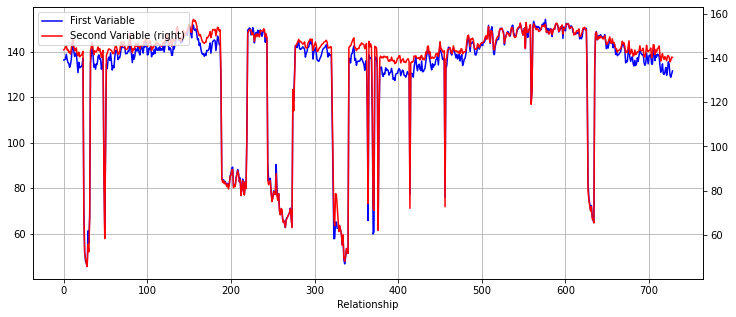

In [38]:
plot_relation(df['Pump Journal 1 Bearing Temperature'],df['Pump Journal 2 Bearing Temperature'])

#Both are very similar in values

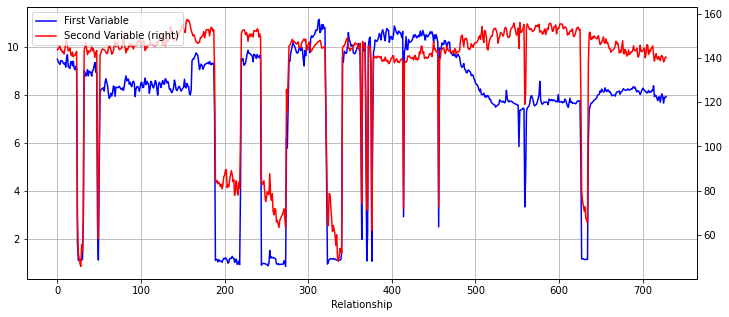

In [39]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Pump Journal 2 Bearing Temperature'])

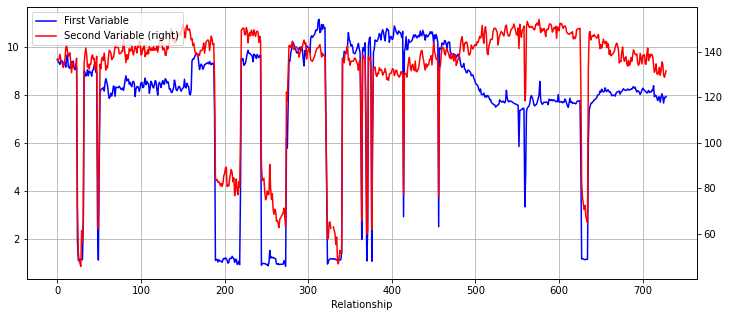

In [40]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Pump Journal 1 Bearing Temperature'])

#Dropping 'Pump Journal 1 Bearing Temperature' to reduce Dimentionality choosing 1 brearing as it has one null value and bearing 2 has none

In [41]:
df=df.drop(['Pump Journal 1 Bearing Temperature'], axis= 'columns')

In [42]:
df.isna().sum()

Auxiliary Boilers Feed Water Header Pressure      0
Heat Recovery System Header Mass Flow             0
Heat Recovery System Header Mass Flow.1           0
Heat Recovery System Header Pressure              0
Lube Oil Tank Temperature                         0
Motor Current Phase A                             0
Motor Input Power                               521
Motor Power Factor                              521
Motor Voltage                                     3
Pump Discharge Pressure                           0
Pump Discharge Volumetric Flow                    0
Pump Journal 2 Bearing Temperature                0
Pump Radial Bearing Vibration                     0
Pump Shaft Speed                                115
Pump Suction Pressure 1                           0
Pump Suction Pressure 2                           0
Pump Suction Strainer Differential Pressure       0
Pump Suction Temperature                          0
Pump Thrust Bearing Temperature 1                 0
Pump Thrust 

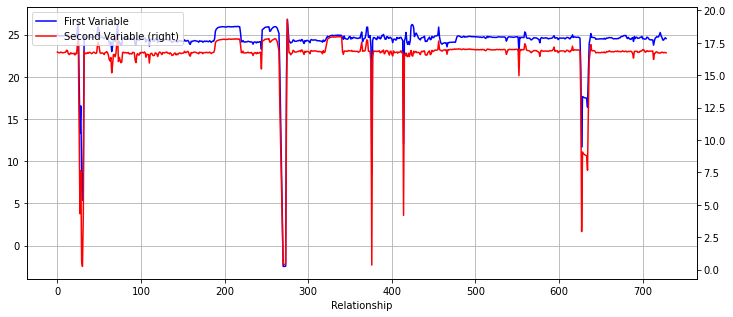

In [43]:
plot_relation(df['Pump Suction Pressure 1'],df['Pump Suction Pressure 2'])

#Dropping Pump Suction Pressure 2

In [44]:
df=df.drop(['Pump Suction Pressure 2'], axis= 'columns')

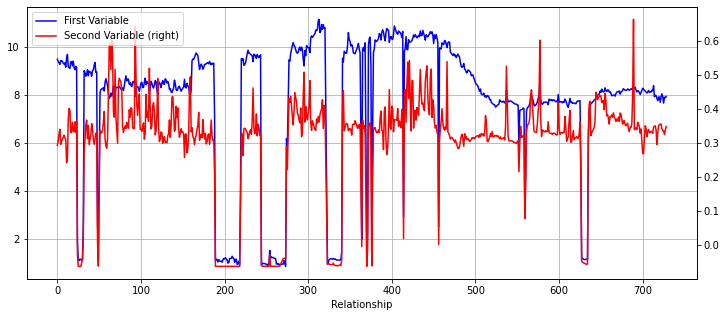

In [45]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Pump Suction Strainer Differential Pressure'])

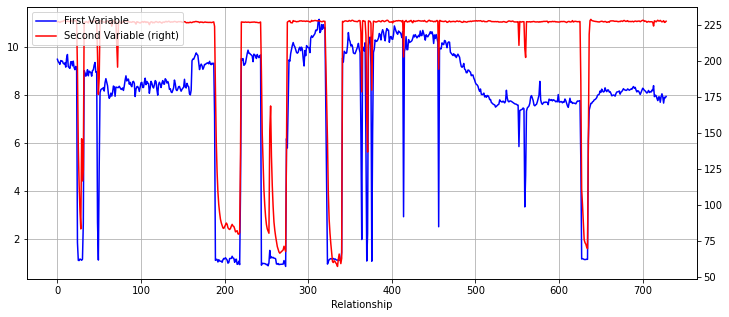

In [46]:
plot_relation(df['Pump Radial Bearing Vibration'],df['Pump Suction Temperature'])

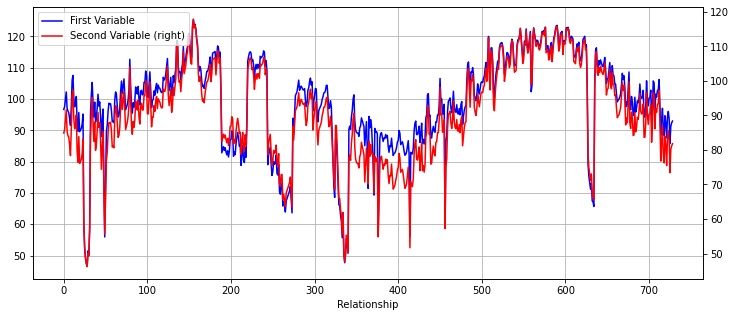

In [47]:
plot_relation(df['Pump Thrust Bearing Temperature 1'],df['Pump Thrust Bearing Temperature 2'])

#Dropping Pump Thrust Bearing Temperature 2

In [48]:
df=df.drop(['Pump Thrust Bearing Temperature 2'], axis='columns')

In [49]:
df.describe()

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Lube Oil Tank Temperature,Motor Current Phase A,Motor Input Power,Motor Power Factor,Motor Voltage,Pump Discharge Pressure,Pump Discharge Volumetric Flow,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,186.000000,186.000000,704.000000,707.000000,707.000000,707.000000,707.000000,592.000000,707.000000,707.000000,707.000000,707.000000
mean,1275.041801,307316.920132,309331.581502,1701.894492,81.740098,131.531430,968.354045,0.914625,4240.878683,1505.573988,822.624623,136.228219,7.787686,3589.133002,24.260876,0.298256,209.302048,99.175860
std,170.427169,64152.811831,67303.171435,221.453413,14.585879,51.691246,202.107079,0.017746,25.674332,583.796196,320.085731,26.061808,2.804036,0.724897,2.475483,0.150378,45.893565,15.041179
min,-2.848590,0.000000,0.000000,19.363597,44.281866,0.000000,0.000000,0.905249,3598.490736,6.985803,0.000000,45.641695,0.846212,3587.175269,-2.475952,-0.062279,57.259923,46.537227
25%,1299.959921,318243.032298,321026.453655,1720.127333,72.887306,148.828962,997.083478,0.910000,4235.929385,1711.123791,899.223709,140.738687,7.720454,3588.649086,24.291647,0.308669,226.592263,90.386569
50%,1300.101277,323805.460729,327857.222822,1739.484954,81.166243,151.311021,1011.015521,0.910152,4239.526282,1750.259259,930.713943,144.999672,8.303268,3589.013127,24.581086,0.333377,227.023054,100.687365
75%,1300.387729,326996.012530,331536.213694,1751.836053,91.745442,153.446078,1023.482272,0.911198,4249.036535,1764.254984,959.453027,149.461377,9.619519,3589.531500,24.728925,0.365721,227.350740,110.554859
max,1302.017837,337113.806471,339509.093059,1805.344086,112.164064,171.524234,1152.828260,1.000000,4262.516345,1813.346996,1251.574085,157.557698,11.161157,3591.100557,26.803915,0.662165,228.651039,125.456462


In [50]:
df.isna().sum()

Auxiliary Boilers Feed Water Header Pressure      0
Heat Recovery System Header Mass Flow             0
Heat Recovery System Header Mass Flow.1           0
Heat Recovery System Header Pressure              0
Lube Oil Tank Temperature                         0
Motor Current Phase A                             0
Motor Input Power                               521
Motor Power Factor                              521
Motor Voltage                                     3
Pump Discharge Pressure                           0
Pump Discharge Volumetric Flow                    0
Pump Journal 2 Bearing Temperature                0
Pump Radial Bearing Vibration                     0
Pump Shaft Speed                                115
Pump Suction Pressure 1                           0
Pump Suction Strainer Differential Pressure       0
Pump Suction Temperature                          0
Pump Thrust Bearing Temperature 1                 0
dtype: int64

In [51]:
df_copy= df.copy(deep='True') # Backing up a Dataframe to be before filling the na values to be later used as test case

In [52]:
df[df['Motor Voltage'].isna()]

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Lube Oil Tank Temperature,Motor Current Phase A,Motor Input Power,Motor Power Factor,Motor Voltage,Pump Discharge Pressure,Pump Discharge Volumetric Flow,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
376,1300.391468,318556.883825,321849.094800,1733.711258,45.725639,97.240159,NaN,NaN,NaN,12.526530,14.866222,61.989750,1.064529,NaN,8.511539,-0.060962,179.538268,57.077404
554,1299.977602,323946.659904,328130.076798,1728.426736,104.774768,148.820940,NaN,NaN,NaN,1682.461223,915.309001,151.842037,7.372437,NaN,24.605388,0.348763,226.925017,117.525914
560,1299.848647,325137.131947,333071.811462,1749.530571,95.963869,150.500129,NaN,NaN,NaN,1030.556163,528.994022,124.636791,4.644980,NaN,25.164491,0.166862,202.219319,104.381674


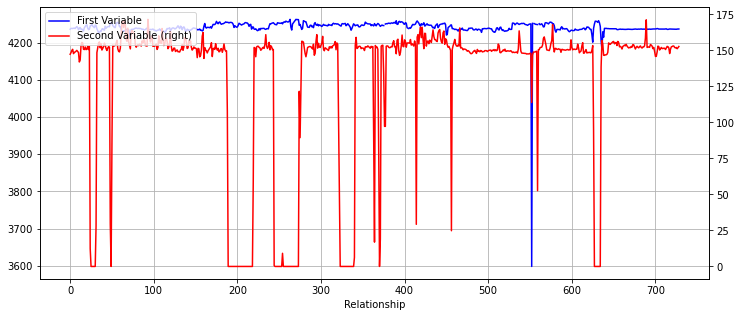

In [53]:
plot_relation(df['Motor Voltage'],df['Motor Current Phase A'])

In [54]:
df['Motor Voltage'].fillna(method='bfill', inplace=True)

#We filled the value with previous values because we can see in the dataset the values are tightly related to their preceding values and the missing values aren't continuous.

In [55]:
df.isna().sum()

Auxiliary Boilers Feed Water Header Pressure      0
Heat Recovery System Header Mass Flow             0
Heat Recovery System Header Mass Flow.1           0
Heat Recovery System Header Pressure              0
Lube Oil Tank Temperature                         0
Motor Current Phase A                             0
Motor Input Power                               521
Motor Power Factor                              521
Motor Voltage                                     0
Pump Discharge Pressure                           0
Pump Discharge Volumetric Flow                    0
Pump Journal 2 Bearing Temperature                0
Pump Radial Bearing Vibration                     0
Pump Shaft Speed                                115
Pump Suction Pressure 1                           0
Pump Suction Strainer Differential Pressure       0
Pump Suction Temperature                          0
Pump Thrust Bearing Temperature 1                 0
dtype: int64

#The missing MNAR values in the columns in 'Motor Input Power', 'Motor Power Factor', and 'Pump Shaft Speed' is very crucial and not random. Whether direct relationship or not we can see the the values had a great impact on our resultant variable. Specially in the case of Pump Shift Speed. we saw how our resultant data dropped at the exact moments.
As the weights corresponding to the variable is quite high we are going to put 0 in the null positions of the data.

In [56]:
df['Pump Shaft Speed']=df['Pump Shaft Speed'].fillna(0)

In [57]:
df['Motor Input Power']=df['Motor Input Power'].fillna(0)

In [58]:
df['Motor Power Factor']=df['Motor Power Factor'].fillna(0)

In [59]:
df.isna().sum()

Auxiliary Boilers Feed Water Header Pressure    0
Heat Recovery System Header Mass Flow           0
Heat Recovery System Header Mass Flow.1         0
Heat Recovery System Header Pressure            0
Lube Oil Tank Temperature                       0
Motor Current Phase A                           0
Motor Input Power                               0
Motor Power Factor                              0
Motor Voltage                                   0
Pump Discharge Pressure                         0
Pump Discharge Volumetric Flow                  0
Pump Journal 2 Bearing Temperature              0
Pump Radial Bearing Vibration                   0
Pump Shaft Speed                                0
Pump Suction Pressure 1                         0
Pump Suction Strainer Differential Pressure     0
Pump Suction Temperature                        0
Pump Thrust Bearing Temperature 1               0
dtype: int64

In [60]:
df.to_csv("final_data.csv")

In [61]:
y=df.pop('Pump Radial Bearing Vibration')

In [62]:
df.columns

Index(['Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Pressure', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Input Power', 'Motor Power Factor',
       'Motor Voltage', 'Pump Discharge Pressure',
       'Pump Discharge Volumetric Flow', 'Pump Journal 2 Bearing Temperature',
       'Pump Shaft Speed', 'Pump Suction Pressure 1',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1'],
      dtype='object')

In [63]:
df.describe()

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Lube Oil Tank Temperature,Motor Current Phase A,Motor Input Power,Motor Power Factor,Motor Voltage,Pump Discharge Pressure,Pump Discharge Volumetric Flow,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,1275.041801,307316.920132,309331.581502,1701.894492,81.740098,131.531430,254.757924,0.240623,4240.919952,1505.573988,822.624623,136.228219,3005.327775,24.260876,0.298256,209.302048,99.175860
std,170.427169,64152.811831,67303.171435,221.453413,14.585879,51.691246,439.039145,0.403104,25.627554,583.796196,320.085731,26.061808,1325.523167,2.475483,0.150378,45.893565,15.041179
min,-2.848590,0.000000,0.000000,19.363597,44.281866,0.000000,0.000000,0.000000,3598.490736,6.985803,0.000000,45.641695,0.000000,-2.475952,-0.062279,57.259923,46.537227
25%,1299.959921,318243.032298,321026.453655,1720.127333,72.887306,148.828962,0.000000,0.000000,4235.931266,1711.123791,899.223709,140.738687,3588.297389,24.291647,0.308669,226.592263,90.386569
50%,1300.101277,323805.460729,327857.222822,1739.484954,81.166243,151.311021,0.000000,0.000000,4239.625555,1750.259259,930.713943,144.999672,3588.962940,24.581086,0.333377,227.023054,100.687365
75%,1300.387729,326996.012530,331536.213694,1751.836053,91.745442,153.446078,697.391631,0.909790,4249.086205,1764.254984,959.453027,149.461377,3589.360908,24.728925,0.365721,227.350740,110.554859
max,1302.017837,337113.806471,339509.093059,1805.344086,112.164064,171.524234,1152.828260,1.000000,4262.516345,1813.346996,1251.574085,157.557698,3591.100557,26.803915,0.662165,228.651039,125.456462


In [64]:
X_train,X_test,y_train,y_test= train_test_split(df,y, test_size=0.2, random_state=56)

In [65]:
lr=LinearRegression()

In [66]:
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
lr.score(X_test,y_test)

0.9430217581059686

In [68]:
linear_prediction=lr.predict(X_test)

In [69]:
for i in range(len(linear_prediction)):
    print("Predicted Value:",linear_prediction[i],"   Real Value:",y_test.iloc[i])

Predicted Value: 8.370932982235868    Real Value: 7.922180487694618
Predicted Value: 8.685474880553416    Real Value: 8.453978040318228
Predicted Value: 8.9145263972161    Real Value: 9.053716501416666
Predicted Value: 3.0002454838032344    Real Value: 2.5025709377791667
Predicted Value: 10.200446455113413    Real Value: 10.241512994669444
Predicted Value: 9.448753519030088    Real Value: 8.952418674102084
Predicted Value: 9.454247470274806    Real Value: 9.931682524715278
Predicted Value: 9.769022182345926    Real Value: 10.519402009238368
Predicted Value: 8.111763823264532    Real Value: 7.653293590142188
Predicted Value: -0.11379758776584392    Real Value: 1.1550346959663194
Predicted Value: 9.237544565832946    Real Value: 8.588494889851216
Predicted Value: 8.513885061805459    Real Value: 8.200795392530209
Predicted Value: 8.812303421436875    Real Value: 7.691585536132465
Predicted Value: 3.7796738166816652    Real Value: 4.006417555805208
Predicted Value: 9.606360805009121    Re

In [70]:
rfr = RandomForestRegressor(max_depth=14)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14)

In [71]:
rfr.score(X_test,y_test)

0.9689612463500306

In [72]:
random_forest_prediction=rfr.predict(X_test)

In [73]:
for i in range(len(random_forest_prediction)):
    print("Predicted Value:",random_forest_prediction[i],"   Real Value:",y_test.iloc[i])

Predicted Value: 7.919113592555662    Real Value: 7.922180487694618
Predicted Value: 8.68979688484495    Real Value: 8.453978040318228
Predicted Value: 8.447537742205432    Real Value: 9.053716501416666
Predicted Value: 2.6284015041257844    Real Value: 2.5025709377791667
Predicted Value: 10.07369129137215    Real Value: 10.241512994669444
Predicted Value: 9.04321396437613    Real Value: 8.952418674102084
Predicted Value: 9.766141172258294    Real Value: 9.931682524715278
Predicted Value: 10.039110318070549    Real Value: 10.519402009238368
Predicted Value: 7.861315479974001    Real Value: 7.653293590142188
Predicted Value: 1.105521615078616    Real Value: 1.1550346959663194
Predicted Value: 8.905547347873153    Real Value: 8.588494889851216
Predicted Value: 8.629125931598512    Real Value: 8.200795392530209
Predicted Value: 7.991559813118687    Real Value: 7.691585536132465
Predicted Value: 3.550542486867776    Real Value: 4.006417555805208
Predicted Value: 9.739124451711858    Real V

#Earlier we filled NA values of three columns that were missing value at MNAR. Lets drop two of those columns that had 71% of na values values and see if our model's performance increases.

In [74]:
X_train_2=X_train.drop(labels=['Motor Power Factor','Motor Input Power'], axis='columns')
X_test_2=X_test.drop(labels=['Motor Power Factor','Motor Input Power'], axis='columns')

In [75]:
X_train_2.columns

Index(['Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Pressure', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Voltage', 'Pump Discharge Pressure',
       'Pump Discharge Volumetric Flow', 'Pump Journal 2 Bearing Temperature',
       'Pump Shaft Speed', 'Pump Suction Pressure 1',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1'],
      dtype='object')

In [76]:
lr_2= LinearRegression()
lr_2.fit(X_train_2,y_train)

LinearRegression()

In [77]:
lr_2.score(X_test_2,y_test)

0.9252741855967022

In [78]:
linear_prediction_modified=lr_2.predict(X_test_2)
for i in range(len(linear_prediction_modified)):
    print("Predicted Value:",linear_prediction_modified[i],"   Real Value:",y_test.iloc[i])

Predicted Value: 9.14948958298943    Real Value: 7.922180487694618
Predicted Value: 8.445370989853073    Real Value: 8.453978040318228
Predicted Value: 8.492289715220101    Real Value: 9.053716501416666
Predicted Value: 2.6308569003655613    Real Value: 2.5025709377791667
Predicted Value: 10.167249237613005    Real Value: 10.241512994669444
Predicted Value: 9.515030651766013    Real Value: 8.952418674102084
Predicted Value: 9.377987196020902    Real Value: 9.931682524715278
Predicted Value: 9.698985861863166    Real Value: 10.519402009238368
Predicted Value: 8.251563401301867    Real Value: 7.653293590142188
Predicted Value: 0.3163143064853422    Real Value: 1.1550346959663194
Predicted Value: 9.09024634647673    Real Value: 8.588494889851216
Predicted Value: 8.085536149498703    Real Value: 8.200795392530209
Predicted Value: 8.269484315404005    Real Value: 7.691585536132465
Predicted Value: 3.82947944155063    Real Value: 4.006417555805208
Predicted Value: 9.160032251845552    Real V

In [79]:
rfr_2 = RandomForestRegressor(max_depth=14)
rfr_2.fit(X_train_2, y_train)

RandomForestRegressor(max_depth=14)

In [80]:
rfr_2.score(X_test_2,y_test)

0.9673556450525347

In [81]:
rfr_prediction_modified=rfr_2.predict(X_test_2)
for i in range(len(rfr_prediction_modified)):
    print("Predicted Value:",rfr_prediction_modified[i],"   Real Value:",y_test.iloc[i])

Predicted Value: 7.956884911251901    Real Value: 7.922180487694618
Predicted Value: 8.752180301628732    Real Value: 8.453978040318228
Predicted Value: 8.634471292421264    Real Value: 9.053716501416666
Predicted Value: 2.438635821432618    Real Value: 2.5025709377791667
Predicted Value: 10.125867224753204    Real Value: 10.241512994669444
Predicted Value: 8.926551372146797    Real Value: 8.952418674102084
Predicted Value: 9.942063454997589    Real Value: 9.931682524715278
Predicted Value: 9.983763281304395    Real Value: 10.519402009238368
Predicted Value: 8.131818649806691    Real Value: 7.653293590142188
Predicted Value: 1.1201751564651024    Real Value: 1.1550346959663194
Predicted Value: 8.73109432388922    Real Value: 8.588494889851216
Predicted Value: 8.50163128342557    Real Value: 8.200795392530209
Predicted Value: 7.761324937671634    Real Value: 7.691585536132465
Predicted Value: 3.693897308457041    Real Value: 4.006417555805208
Predicted Value: 9.818086974802236    Real V

#We saw our model did slightly worse when we dropped those columns.
The best result so far we got was performing Random Forest Regression with max depth=14 on our original X_train,y_train dataset; with test set accuracy of more than 97%

#We try an alternate method to check if dropping na values in the "" column would have gib=ven us better result


In [82]:
df_copy.isna().sum()

Auxiliary Boilers Feed Water Header Pressure      0
Heat Recovery System Header Mass Flow             0
Heat Recovery System Header Mass Flow.1           0
Heat Recovery System Header Pressure              0
Lube Oil Tank Temperature                         0
Motor Current Phase A                             0
Motor Input Power                               521
Motor Power Factor                              521
Motor Voltage                                     3
Pump Discharge Pressure                           0
Pump Discharge Volumetric Flow                    0
Pump Journal 2 Bearing Temperature                0
Pump Radial Bearing Vibration                     0
Pump Shaft Speed                                115
Pump Suction Pressure 1                           0
Pump Suction Strainer Differential Pressure       0
Pump Suction Temperature                          0
Pump Thrust Bearing Temperature 1                 0
dtype: int64

In [83]:
df_copy.drop(labels=['Motor Input Power','Motor Power Factor'], axis=1, inplace=True)

In [84]:
df_copy[df_copy['Pump Shaft Speed'].isna()]

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Discharge Pressure,Pump Discharge Volumetric Flow,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
24,1300.659484,324576.400817,324225.851234,1700.520524,57.182572,12.397544,4245.080022,171.056890,135.552824,67.887314,1.845784,NaN,25.879135,-0.028867,193.606151,59.913045
25,1300.744363,323634.106394,323243.967976,1721.510741,53.507963,0.000000,4245.639407,29.043134,124.673353,51.697158,1.101537,NaN,26.309858,-0.062156,140.721412,51.955539
26,1300.185447,322560.475535,322652.398463,1720.149307,55.106568,0.000000,4249.457287,21.782275,156.512762,49.258010,1.093600,NaN,20.200700,-0.061978,113.761319,49.222603
27,1301.054484,324482.265211,325441.754273,1732.534422,44.811990,0.000000,4244.698785,15.662032,161.884793,47.030669,1.155035,NaN,13.290215,-0.061862,95.761521,47.476479
28,1300.315947,313338.939825,314946.679924,1758.384872,44.281866,0.000000,4242.432654,19.383258,161.299405,45.641695,1.137468,NaN,16.541685,-0.061935,83.270451,46.537227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,-0.011234,5242.412982,45146.004905,22.003786,85.164929,0.000000,4254.393452,20.735463,0.000000,72.674924,1.132244,NaN,17.494242,-0.053627,73.741084,73.117614
632,-0.001679,0.000000,39953.110102,21.973760,87.913917,0.000000,4258.951853,20.671747,0.000000,67.249013,1.139194,NaN,17.492093,-0.055710,72.777858,67.448402
633,-0.023586,1136.542519,42378.407743,21.978818,86.583185,0.000000,4253.602945,20.627889,0.000000,66.840237,1.144345,NaN,17.452043,-0.055732,70.628688,67.134861
634,-0.253566,0.000000,40099.999136,22.801938,88.210522,0.000000,4243.731000,19.566757,0.000000,65.375466,1.143610,NaN,16.392000,-0.055479,69.666396,65.676148


In [85]:
df_copy.isna().sum()

Auxiliary Boilers Feed Water Header Pressure      0
Heat Recovery System Header Mass Flow             0
Heat Recovery System Header Mass Flow.1           0
Heat Recovery System Header Pressure              0
Lube Oil Tank Temperature                         0
Motor Current Phase A                             0
Motor Voltage                                     3
Pump Discharge Pressure                           0
Pump Discharge Volumetric Flow                    0
Pump Journal 2 Bearing Temperature                0
Pump Radial Bearing Vibration                     0
Pump Shaft Speed                                115
Pump Suction Pressure 1                           0
Pump Suction Strainer Differential Pressure       0
Pump Suction Temperature                          0
Pump Thrust Bearing Temperature 1                 0
dtype: int64

In [86]:
df_copy.dropna(inplace=True)

In [87]:
df_copy.isna().sum()

Auxiliary Boilers Feed Water Header Pressure    0
Heat Recovery System Header Mass Flow           0
Heat Recovery System Header Mass Flow.1         0
Heat Recovery System Header Pressure            0
Lube Oil Tank Temperature                       0
Motor Current Phase A                           0
Motor Voltage                                   0
Pump Discharge Pressure                         0
Pump Discharge Volumetric Flow                  0
Pump Journal 2 Bearing Temperature              0
Pump Radial Bearing Vibration                   0
Pump Shaft Speed                                0
Pump Suction Pressure 1                         0
Pump Suction Strainer Differential Pressure     0
Pump Suction Temperature                        0
Pump Thrust Bearing Temperature 1               0
dtype: int64

In [88]:
df_copy

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Discharge Pressure,Pump Discharge Volumetric Flow,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
0,1299.932367,302136.689109,305769.201164,1772.343865,74.353358,147.288687,4236.037884,1783.732923,875.678633,143.759105,9.495489,3589.907315,24.949540,0.292871,226.883646,96.691254
1,1300.251168,304640.254305,308413.348729,1763.698347,75.680458,148.394112,4238.021614,1775.792153,892.355763,144.127431,9.396263,3589.040872,24.899770,0.306670,227.210390,97.553439
2,1300.324670,307767.688128,309923.396662,1751.874513,79.740353,149.876022,4238.361246,1764.204951,914.950121,144.949424,9.348186,3588.336589,24.849275,0.327271,226.870120,100.013257
3,1300.981538,304965.223294,305798.703871,1745.351528,81.905311,150.727952,4237.947916,1757.663677,927.541213,145.692630,9.281961,3589.294720,24.800835,0.340026,226.517285,102.287710
4,1300.122183,303890.394355,305456.528124,1769.924800,74.258772,147.729870,4238.712911,1781.724831,880.697922,143.702224,9.440647,3589.287536,24.900963,0.295442,226.968670,97.097614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1300.029567,326989.175318,330751.099401,1747.557007,66.601187,151.714612,4236.323344,1762.064092,927.962399,140.428977,7.929656,3590.515254,24.355531,0.335756,227.171926,93.593512
725,1299.978356,328146.787883,332409.290667,1746.184179,53.723855,152.014832,4235.913672,1760.840269,930.713943,138.296495,7.665222,3591.063641,24.346442,0.335747,227.723641,85.839764
726,1300.022287,322235.007479,325881.871601,1753.851885,63.205607,151.132782,4236.364457,1767.842744,918.104302,139.073487,7.909175,3590.744042,24.512404,0.324609,226.533885,91.384524
727,1300.001139,326788.909221,328794.992017,1745.933160,65.039585,151.935908,4236.504883,1760.330746,931.820709,140.468876,7.883044,3590.643061,24.622518,0.337274,226.719310,92.404449


In [89]:
y2=df_copy.pop('Pump Radial Bearing Vibration')
X_train_3,X_test_3,y_train_3,y_test_3= train_test_split(df_copy,y2, test_size=0.2, random_state=56)

In [90]:
lr3=LinearRegression()
lr3.fit(X_train_3,y_train_3)
lr3.score(X_test_3,y_test_3)

0.6803678532636128

In [91]:
rfr3= RandomForestRegressor(max_depth=12)
rfr3.fit(X_train_3,y_train_3)
rfr3.score(X_test_3,y_test_3)

0.8137183595792195

#We saw how dropping NA values in rows and columns doesn't increase the accuracy of our models drastically. On other hand we might drop important data unintentionally and tend our model to overfit. So we would take our intitial approach as the best one and use Random Forest Regressor and train it on our original (X_train,y_train) and test its accuracy on (X_test, y_test)  

In [92]:
rfr.score(X_test, y_test)  

0.9689612463500306